In [1]:
import os
os.getcwd()

'C:\\Users\\kskua\\Documents\\JupyterNotebooks\\INeuron FULL STACK DS notebooks\\Deep Learning Lectures'

In [2]:
import tensorflow as tf
tf.__version__

'2.6.0'

In [3]:
tf.keras.__version__

'2.6.0'

In [4]:
check = ['GPU', 'CPU']

for d in check:
    out = tf.config.list_physical_devices(d)
    if len(out) > 0:
        print(f'{d} is available')
        print('details', out)
    else:
        print(f'{d} is not available')

GPU is available
details [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
CPU is available
details [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Loading mnist data
mnist = tf.keras.datasets.mnist

(X_train_ful, y_train_full), (X_test, y_test) = mnist.load_data()

In [7]:
X_train_ful.shape, y_train_full.shape, X_test.shape, X_train_ful.dtype # Checking shapes of the train/test sets and data types

((60000, 28, 28), (60000,), (10000, 28, 28), dtype('uint8'))

In [8]:
# Creating validation set for X and y. Scaling for X.
X_valid, X_train = X_train_ful[:5000] / 255., X_train_ful[5000:] / 255. 
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

(-0.5, 27.5, 27.5, -0.5)

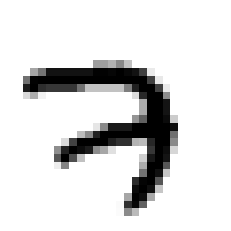

In [9]:
plt.imshow(X_train[0], cmap='binary') # Showing first number from X_train dataset
plt.axis('off') # Turning off axis

<AxesSubplot:>

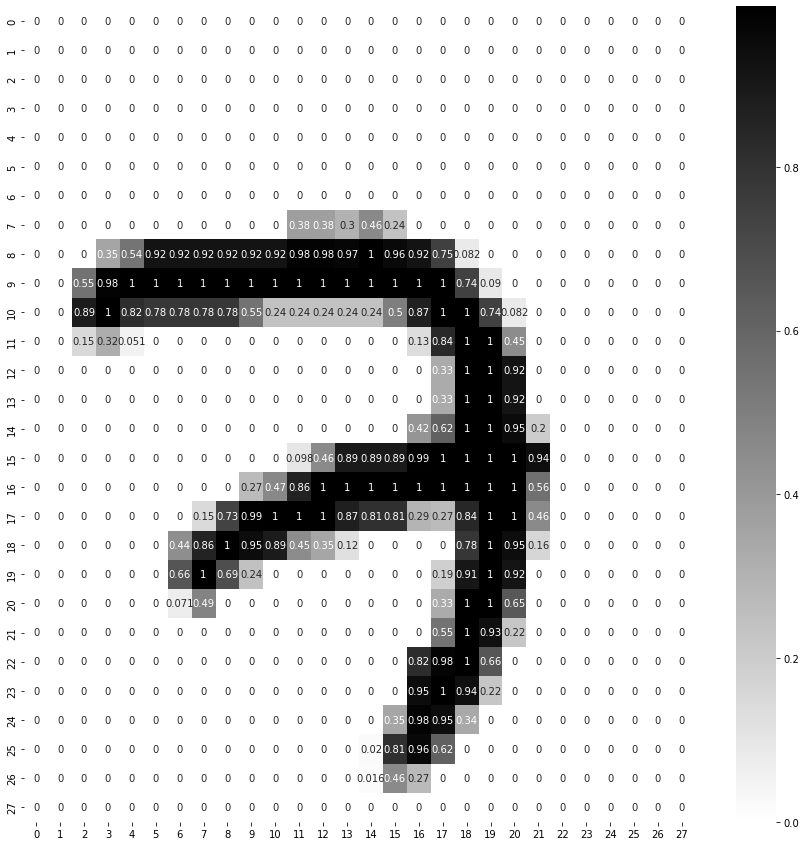

In [10]:
# Visualizing pixel values
plt.figure(figsize=(15,15))
sns.heatmap(X_train[0], annot=True, cmap='binary')


In [11]:
# Definining layers
LAYERS = [tf.keras.layers.Flatten(input_shape=[28,28], name='inputLayer'),
         tf.keras.layers.Dense(300, activation='relu', name='hiddenLayer1'),
         tf.keras.layers.Dense(100, activation='relu', name='hiddenLayer2'), 
         tf.keras.layers.Dense(10, activation='softmax', name='outputLayer')]

Sequential model:
    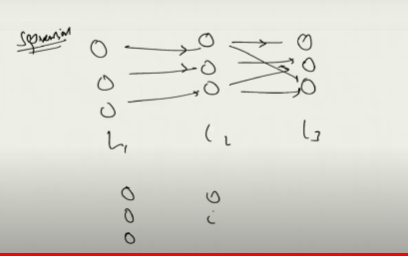

In [12]:
# Defining model
model_clf = tf.keras.models.Sequential(layers=LAYERS)

In [13]:
model_clf.layers

In [14]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputLayer (Flatten)         (None, 784)               0         
_________________________________________________________________
hiddenLayer1 (Dense)         (None, 300)               235500    
_________________________________________________________________
hiddenLayer2 (Dense)         (None, 100)               30100     
_________________________________________________________________
outputLayer (Dense)          (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


Linear algebra in this model

In [15]:
# First layer
784  * 300 + 300

235500

In [16]:
# Second layer
300 * 100 + 100

30100

In [17]:
# Last layer
100 * 10 + 10

1010

In [19]:
# Total number of weights
235500 + 30100 + 1010

266610

In [20]:
# First layer check
hidden1 = model_clf.layers[1]
hidden1.name

'hiddenLayer1'

In [21]:
model_clf.get_layer(hidden1.name) is hidden1

True

In [22]:
# Checking type of the layer weights (list of lists)
type(hidden1.get_weights())

list

In [23]:
# Checking out the inside of the hidden layer weights
# First array are weights (randomly initialized - we can also set wegiths with the method set_weights), second is bias (set to 0)
hidden1.get_weights()

[array([[ 0.0096148 , -0.06298035,  0.00401217, ..., -0.01843715,
         -0.06476311,  0.02567964],
        [-0.02340082, -0.06940171, -0.02214798, ..., -0.02175729,
         -0.05145253, -0.06622813],
        [-0.01335258, -0.06711179,  0.02624145, ..., -0.02595275,
          0.05836695, -0.00588943],
        ...,
        [ 0.04440519,  0.06243758, -0.00970411, ...,  0.02005458,
         -0.00661156,  0.06534599],
        [-0.04888036, -0.04460881,  0.0610612 , ..., -0.0627121 ,
         -0.05273358, -0.0287292 ],
        [ 0.02919445, -0.02102191,  0.06813242, ...,  0.05413614,
          0.07390344, -0.02035018]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [24]:
# Seperation of weights and biases
weights, biases = hidden1.get_weights()

In [28]:
# Printing shape of weights
print("shape\n", weights.shape, "\n", weights)

shape
 (784, 300) 
 [[ 0.0096148  -0.06298035  0.00401217 ... -0.01843715 -0.06476311
   0.02567964]
 [-0.02340082 -0.06940171 -0.02214798 ... -0.02175729 -0.05145253
  -0.06622813]
 [-0.01335258 -0.06711179  0.02624145 ... -0.02595275  0.05836695
  -0.00588943]
 ...
 [ 0.04440519  0.06243758 -0.00970411 ...  0.02005458 -0.00661156
   0.06534599]
 [-0.04888036 -0.04460881  0.0610612  ... -0.0627121  -0.05273358
  -0.0287292 ]
 [ 0.02919445 -0.02102191  0.06813242 ...  0.05413614  0.07390344
  -0.02035018]]


In [29]:
# Printing shape of biases and the cvalues
print("shape\n", biases.shape, "\n", biases)

shape
 (300,) 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [30]:
# Defining loss function, optimizer, metrics and compiling in a model
LOSS_FUNCTION = 'sparse_categorical_crossentropy'
OPTIMIZER = "SGD"
METRICS = ['accuracy']

model_clf.compile(loss=LOSS_FUNCTION, optimizer=OPTIMIZER, metrics=METRICS)

In [31]:
# Or defning loss function, optimizer, metrics and compiling in a model in a automatic way
model_clf.compile(loss=tf.losses.sparse_categorical_crossentropy,
                 optimizer=tf.keras.optimizers.SGD(0.02),
                 metrics=['accuracy'])

In [32]:
# Number of iterations (epochs), setting the validation set, fitting model
EPOCHS = 30
VALIDATION_SET = (X_valid, y_valid)

history = model_clf.fit(X_train, y_train, epochs=EPOCHS,
                       validation_data=VALIDATION_SET)

Epoch 1/30
1719/1719 [==============================] - 5s 2ms/step - loss: 0.4576 - accuracy: 0.8770 - val_loss: 0.2425 - val_accuracy: 0.9332
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2218 - accuracy: 0.9353 - val_loss: 0.1806 - val_accuracy: 0.9492
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1712 - accuracy: 0.9500 - val_loss: 0.1505 - val_accuracy: 0.9598
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1395 - accuracy: 0.9605 - val_loss: 0.1311 - val_accuracy: 0.9636
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1177 - accuracy: 0.9665 - val_loss: 0.1180 - val_accuracy: 0.9676
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1005 - accuracy: 0.9708 - val_loss: 0.1091 - val_accuracy: 0.9684
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0872 - accuracy: 0.9762 - val_loss: 0.0964 - val_accuracy:

Batch size is by default 32, so it is dividing X_train.shape by 32. 1719 is the output so it is taking 1719. 